# Project Description:  Food Products Startup

* <b> Hey! I'm Ron Sherwi. </b> In this project I investigated user behavior for food company's app. 


* <b>The investigation was done by A/A/B test. </b> Group B has another design for the website. 


* <b> The data was collected between 25/07/2019 - 07/08/2019. </b> More than 7500 users took a part.


* <b> The data includes </b> event type, user id, date & time of the event, and user's group.


*  <b> My goal </b> is to check for significant difference between the control groups and group B.


* <b> My project is divided to 4 parts: </b>
    1. Prepare the data for analysis.
    2. Study and check the data.
    3. Study the event funnel.
    4. Study the results of the experiment.


# Step 1 - prepare the data for analysis

### Import useful libraries
* Basics - Pandas, NumPy, SciPy, Math
* Visualization - Matplotlib, Seaborn, Plotly

In [139]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
from plotly import graph_objects as go
import plotly.express as px

### Load the data

In [140]:
file = r'logs_exp_us.csv'
data = pd.read_csv(file, sep='\t')

### First look on data

In [141]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.9 MB


In [142]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [143]:
data.tail()

,EventName,DeviceIDHash,EventTimestamp,ExpId
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246
244125,OffersScreenAppear,5746969938801999050,1565212517,246


### First TDL:
* <b> Convert types & optimize the data </b> : change to categorical values (EventName & ExpId) & convert dates (EventTimestamp)
* <b> change the rows' names to a more convenient. </b>

In [145]:
# Optimizing the data - change to categorical values
data = pd.read_csv(file, sep='\t', dtype={'EventName': 'category', 'ExpId': 'category'})

In [146]:
# Changing Timestamp to Datetime
data.EventTimestamp = pd.to_datetime(data.EventTimestamp, unit='s')

### Adding date in a separate column

In [147]:
data['event_date'] = pd.to_datetime(data.EventTimestamp.dt.date)
data.columns = ['event_name', 'user_id', 'event_datetime', 'group', 'event_date']
data = data[['event_name', 'user_id', 'event_datetime',  'event_date', 'group']]

### 'group' column:
* <b> 3 groups </b> - 246(A), 247(A), 248(B)
* <b> There are no users that were connected to 2 groups or more </b> 

In [95]:
# Checking for users that connected to 2 groups or more
users_per_groups = data.groupby('user_id').agg({'group' : 'nunique'}).reset_index()
users_per_groups.columns = ['user_id', 'num_of_groups']
print('Number of users that connected to 2 groups or more:',
     len(users_per_groups.query('num_of_groups > 1')))

Number of users that connected to 2 groups or more: 0


### Removing duplicates

In [154]:
# Removing duplicates
print('Number of duplicates:', data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)

Number of duplicates: 413


In [98]:
# Meanwhile
data.head()

,event_name,user_id,event_datetime,event_date,group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,2019-07-25,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,2019-07-25,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,2019-07-25,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,2019-07-25,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,2019-07-25,248


# Step 2 -study and check the data

## Q1 - How many events are in the logs?

In [155]:
# Calculating number of events
print('Number of events: ', len(data), '\n')

Number of events:  243713 



In [156]:
# Calculating number of events per group
events_per_group = data.groupby('group').agg({'user_id': 'count'}).reset_index()
events_per_group.columns = ['group', 'num_of_events']
events_per_group

,group,num_of_events
0,246,80181
1,247,77950
2,248,85582


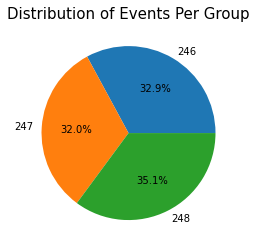

In [157]:
# Visualization
plt.pie(events_per_group.num_of_events, labels=events_per_group.group, autopct='%1.1f%%')
plt.title('Distribution of Events Per Group', fontsize=15)
plt.show()

## Q2 - How many users are in the logs?

In [102]:
# Calculating number of users
print('Number of Users: ', len(data.user_id.drop_duplicates()), '\n')

Number of Users:  7551 



In [103]:
# Calculating number of users per group
users_per_group = data.groupby('group').agg({'user_id': 'nunique'}).reset_index()
users_per_group.columns = ['group', 'num_of_users']
users_per_group

,group,num_of_users
0,246,2489
1,247,2520
2,248,2542


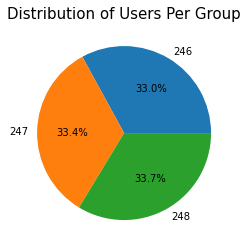

In [104]:
# Visualization
plt.pie(users_per_group.num_of_users, labels=users_per_group.group, autopct='%1.1f%%')
plt.title('Distribution of Users Per Group', fontsize=15)
plt.show()

## Q3 - What's the average number of events per user?
### Answer:
* There are 32.28 events per user
* The users in group 248 have more events than the control groups.

In [105]:
# Calculating the average number of events per user
events_per_userANDgroup = data.groupby(['user_id', 'group']
                                      ).agg({'event_datetime': 'count'}).reset_index()
events_per_userANDgroup.columns = ['user_id', 'group', 'number_of_events']
print('Average number of events per user is: {:.2f} \n'.format(
    events_per_userANDgroup.number_of_events.mean()))

Average number of events per user is: 10.76 



In [106]:
# Calculating the average number of events per user in each group
avg_events_per_userANDgroup = events_per_userANDgroup.groupby(
    'group').agg({'number_of_events': 'mean'}).reset_index()
avg_events_per_userANDgroup.columns = ['group', 'avg_num_of_events']
avg_events_per_userANDgroup

,group,avg_num_of_events
0,246,10.618594
1,247,10.323136
2,248,11.333863


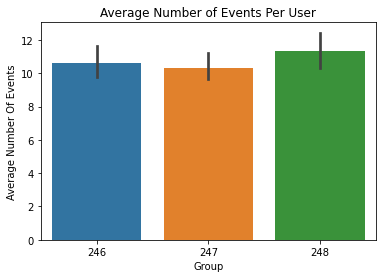

In [107]:
# Visualization
ax = sns.barplot(x='group', y='number_of_events', data=events_per_userANDgroup)
plt.title('Average Number of Events Per User')
plt.xlabel('Group')
plt.ylabel('Average Number Of Events')
plt.show()

## Q4 - What period of time does the data cover?

In [159]:
# General information of datetime
data[['event_datetime', 'event_date']].describe()

<ipython-input-159-5dfecadcf6dd>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-159-5dfecadcf6dd>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,event_datetime,event_date
count,243713,243713
unique,176654,14
top,2019-08-01 14:40:35,2019-08-01 00:00:00
freq,9,36141
first,2019-07-25 04:43:36,2019-07-25 00:00:00
last,2019-08-07 21:15:17,2019-08-07 00:00:00


### 2) Plot a histogram by date and time.
* Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture.
* Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?

### Answer: As we can see, the data of the first week (July month) is missing, and it's only 1.16% of the data.  In early August the data begin to be collected in large quantities and on a regular basis.

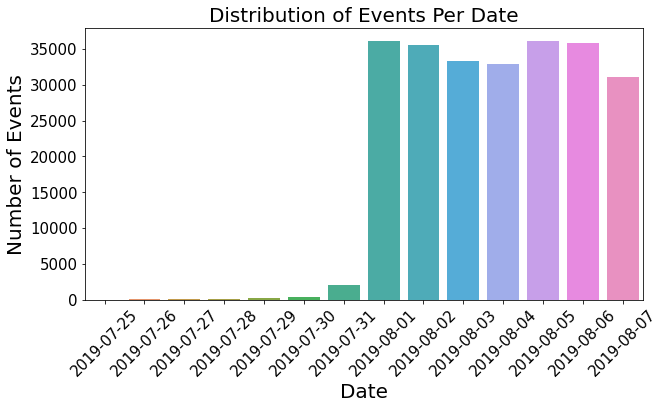

In [166]:
data['event_date'] = data.event_datetime.dt.date
# Checking distribution of events per date
events_per_date = data.groupby('event_date').agg({'user_id': 'count'}).reset_index()
events_per_date.columns = ['event_date', 'num_of_events']

# Visualization
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='event_date', y='num_of_events', data=events_per_date)
plt.title('Distribution of Events Per Date', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Events', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Let's work on new data, without July

In [110]:
new_data = data.query('event_datetime >= "2019-08-01"')

In [111]:
print('Number of events that i lost: {}, which is {:.2%} of the data'.format(
    (len(data) - len(new_data)),((len(data) - len(new_data)) / len(data))))
start_users = len(data.user_id.drop_duplicates())
lost_users = len(data.user_id.drop_duplicates()) - len(new_data.user_id.drop_duplicates())
print('Number of users that i lost: {}, which is {:.2%} of the data'.format(
    lost_users, (lost_users / start_users)))

Number of events that i lost: 2826, which is 1.16% of the data
Number of users that i lost: 17, which is 0.23% of the data


# Step 3 - study the event funnel

## Q1 - See what events are in the logs and their frequency of occurrence

### We can see most of the users are gone in the 'OffersScreenAppear' stage.

In [114]:
# Calculatig number of events and their frequency
events_num = new_data.groupby('event_name').agg({
    'user_id': 'count'}).sort_values(by='user_id', ascending=False).reset_index()
events_num.columns = ['event_name', 'num']
events_num

,event_name,num
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


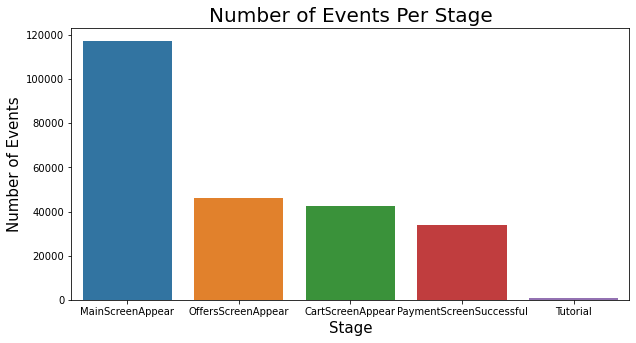

In [167]:
plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='event_name', y='num', data=events_num,
                 order=events_num.sort_values(by='num', ascending=False).event_name)
plt.title('Number of Events Per Stage', fontsize='20')
plt.xlabel('Stage', fontsize='15')
plt.ylabel('Number of Events', fontsize='15')
plt.show()


In [116]:
# Calculating number of users per stage
actions_per_user = new_data.groupby('event_name').agg({
    'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).reset_index()
actions_per_user.columns = ['event_name', 'users_num']
actions_per_user

,event_name,users_num
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


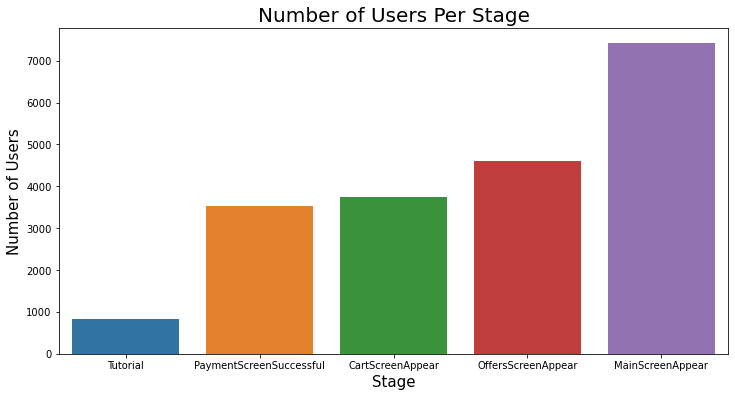

In [117]:
plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='event_name', y='users_num', data=actions_per_user,
                 order=actions_per_user.sort_values(by='users_num').event_name)
plt.title('Number of Users Per Stage', fontsize='20')
plt.xlabel('Stage', fontsize='15')
plt.ylabel('Number of Users', fontsize='15')
plt.show()

### I guess that 'Tutorial' stage is optional for those who needs guidance. So we can remove this stage from the funnel

In [121]:
new_data = new_data.query('event_name != "Tutorial"')

## Q4 - Use the event funnel to find the share of users that proceed from each stage to the next

In [122]:
# Editing the funnel - removing 'Tutorial' stage
actions_per_user = actions_per_user.query('event_name != "Tutorial"')

In [123]:
# Visualization
fig = go.Figure(go.Funnel(
    y = ['Main', 'Offers', 'Cart', 'Payment'],
    x = actions_per_user.users_num.tolist()
    ))

fig.update_layout(
    title={
        'text': "Users Funnel",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))
fig.show() 

# Step 4 -  study the results of the experiment

## Q1- Does there a statistically significant difference between the control groups?
## Q2- Does there a statistically significant difference between group B and the control groups?

### I decided to check the conversion rate - share of users that completed an order.
- <b> I'll use Z test for propotions - </b> for each stage (main, offers, cart and payment).
- <b> There are 12 tests at all </b> so I built a function for checking the statistical difference for any stage.
- <b> The statistical significance 'alpha' now is divided by the number of tests ('Bonferroni correction') - </b> So if I used value of 0.05 for one test, now it's 0.05/12. It means that there is probability of 5% that one of our next 12 tests that we'll reject accidently.
- <b> I'm aware to the low limit of our 'alpha' - </b> and I'll take another look on borderline results.

### Build a funnel for each group

In [127]:
# Calculating number of users per stage for
actions_per_userGrouped = new_data.groupby(['event_name', 'group']).agg({
    'user_id': 'nunique'}).sort_values(by=['group', 'user_id'], ascending=False).reset_index()
actions_per_userGrouped.columns = ['event_name', 'group', 'users_num']
actions_per_userGrouped

,event_name,group,users_num
0,MainScreenAppear,248,2493
1,OffersScreenAppear,248,1531
2,CartScreenAppear,248,1230
3,PaymentScreenSuccessful,248,1181
4,Tutorial,248,0
5,MainScreenAppear,247,2476
6,OffersScreenAppear,247,1520
7,CartScreenAppear,247,1238
8,PaymentScreenSuccessful,247,1158
9,Tutorial,247,0


### Build a function for Z-test of proportions

In [174]:
def z_test_proportions(group1, group2, event_name, alpha):
    # Test for proportions of actions between 2 groups in our dataframes - 
    # df1 = new_data - includes the number of users per group
    # df2 = actions_per_userGrouped - includes the number of users in the action
    # group 1 & 2 - the number of groups (category type = string)
    # event_name - the name of the action
    # alpha - statistical significance
    
    # Number of users per action
    sucesses1 = actions_per_userGrouped.query(
        'event_name == @event_name and group == @group1').users_num.sum()
    sucesses2 = actions_per_userGrouped.query(
        'event_name == @event_name and group == @group2').users_num.sum()
    sucessesCombined = sucesses1 + sucesses2
    
    # Number of users per group
    trials1 = len(new_data.query('group == @group1').user_id.drop_duplicates())
    trials2 = len(new_data.query('group == @group2').user_id.drop_duplicates())
    trialsCombined = trials1 + trials2
    
    # Share of users who performed in the action
    p1 = sucesses1 / trials1
    p2 = sucesses2 / trials2
    pCombined = sucessesCombined / trialsCombined
    
    difference = p1 - p2 
    distr = st.norm(0, 1)
    
    z_value = difference / math.sqrt(pCombined * (1 - pCombined) * (1/trials1 + 1/trials2))
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('Action: ', event_name)
    print('Group {}: Users: {} | Performed the action : {} | Proportion: {:.5%}'.format(
        group1, trials1, sucesses1, p1))
    print('Group {}: Users: {} | Performed the action : {} | Proportion: {:.5%}'.format(
        group2, trials2, sucesses2, p2))
    print('H0: There is no significant difference between the proportions of the groups.')
    print('H1: There is significant difference between the proportions of the groups.')
    print('Alpha level: {:.5f}'.format(alpha))
    print('RESULTS: p-value: {:.5f}'.format(p_value))
    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

### Q1 - Checking difference between control groups

In [176]:
alpha = 0.05 / 12

for i in actions_per_userGrouped.query('event_name != "Tutorial"').event_name.unique():
    z_test_proportions('246', '247', i, alpha)
    print('')

Action:  MainScreenAppear
Group 246: Users: 2483 | Performed the action : 2450 | Proportion: 98.67096%
Group 247: Users: 2512 | Performed the action : 2476 | Proportion: 98.56688%
H0: There is no significant difference between the proportions of the groups.
H1: There is significant difference between the proportions of the groups.
Alpha level: 0.00417
RESULTS: p-value: 0.75267
Failed to reject the null hypothesis: there is no reason to consider the proportions different

Action:  OffersScreenAppear
Group 246: Users: 2483 | Performed the action : 1542 | Proportion: 62.10230%
Group 247: Users: 2512 | Performed the action : 1520 | Proportion: 60.50955%
H0: There is no significant difference between the proportions of the groups.
H1: There is significant difference between the proportions of the groups.
Alpha level: 0.00417
RESULTS: p-value: 0.24786
Failed to reject the null hypothesis: there is no reason to consider the proportions different

Action:  CartScreenAppear
Group 246: Users: 24

### There is no significant difference between the groups

### Q2 - Checking difference between group B and control groups

In [178]:
# Groups 246 & 248; Tests 5-8
for i in actions_per_userGrouped.query('event_name != "Tutorial"').event_name.unique():
    z_test_proportions('246', '248', i, alpha)
    print('')

Action:  MainScreenAppear
Group 246: Users: 2483 | Performed the action : 2450 | Proportion: 98.67096%
Group 248: Users: 2535 | Performed the action : 2493 | Proportion: 98.34320%
H0: There is no significant difference between the proportions of the groups.
H1: There is significant difference between the proportions of the groups.
Alpha level: 0.00417
RESULTS: p-value: 0.33871
Failed to reject the null hypothesis: there is no reason to consider the proportions different

Action:  OffersScreenAppear
Group 246: Users: 2483 | Performed the action : 1542 | Proportion: 62.10230%
Group 248: Users: 2535 | Performed the action : 1531 | Proportion: 60.39448%
H0: There is no significant difference between the proportions of the groups.
H1: There is significant difference between the proportions of the groups.
Alpha level: 0.00417
RESULTS: p-value: 0.21442
Failed to reject the null hypothesis: there is no reason to consider the proportions different

Action:  CartScreenAppear
Group 246: Users: 24

In [179]:
# Groups 247 & 248; Tests 9-12
for i in actions_per_userGrouped.query('event_name != "Tutorial"').event_name.unique():
    z_test_proportions('247', '248', i, alpha)
    print('')

Action:  MainScreenAppear
Group 247: Users: 2512 | Performed the action : 2476 | Proportion: 98.56688%
Group 248: Users: 2535 | Performed the action : 2493 | Proportion: 98.34320%
H0: There is no significant difference between the proportions of the groups.
H1: There is significant difference between the proportions of the groups.
Alpha level: 0.00417
RESULTS: p-value: 0.51950
Failed to reject the null hypothesis: there is no reason to consider the proportions different

Action:  OffersScreenAppear
Group 247: Users: 2512 | Performed the action : 1520 | Proportion: 60.50955%
Group 248: Users: 2535 | Performed the action : 1531 | Proportion: 60.39448%
H0: There is no significant difference between the proportions of the groups.
H1: There is significant difference between the proportions of the groups.
Alpha level: 0.00417
RESULTS: p-value: 0.93338
Failed to reject the null hypothesis: there is no reason to consider the proportions different

Action:  CartScreenAppear
Group 247: Users: 25

### There is no significant difference between the groups

# Conclusion: 
### Users Funnel:

* <b> General numbers: </b> 
    - 7419 users were performed in the 'Main' stage.
    - 38% of our users left the service after the 'Main' stage and didn't move to 'Offers'.
    - But! 81% of the users in the 'offers' stage moved to the cart, and 95% of the users in the cart paid. 


* <b> It means users that didn't find what they need in the 'Main'. </b> We need to ask:
    - Do all the opportunities and products are performed conveniently?
    - Do these users come from a specific source? 
    - Was there a technical error during those dates?


### A/A/B Test Results:
* <b> There is no significant difference between the control groups </b> , which means the data were collected good.


* <b> Unfortunately, there is no significant difference between the control groups and group B.</b> The new design didn't affect the users' behavior.